In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Audio

### Modulated chirp

In [2]:
from synthetic_impulse_noise import ModulatedChirp, ModulatedHarmonicSum, ModulatedWhiteNoise

module = ModulatedChirp(sr=44100, T_signal=1., params_config=None)

In [3]:
signal = module.generate(
    f0=500,
    k=1,
    tau_attack=0.05,
    temporal_support=.1,
)

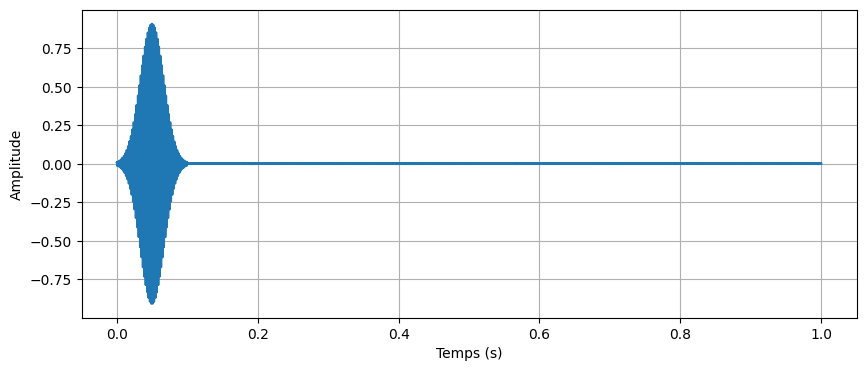

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(module.t, signal)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

display(Audio(signal, rate=module.sr))

## Somme décroissante d'harmoniques

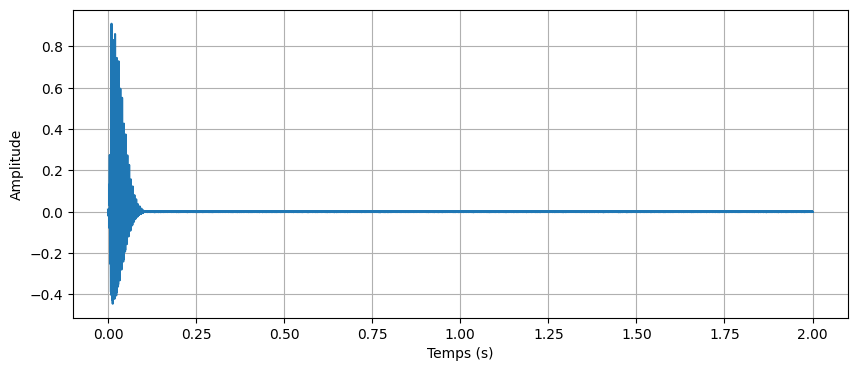

In [5]:
module_harm = ModulatedHarmonicSum(sr=44100, T_signal=2., params_config=None)

signal_harm = module_harm.generate(
    f0=200,
    n_harmonics=100,
    tau_attack=0.01,
    temporal_support=.1,
)

plt.figure(figsize=(10, 4))
plt.plot(module_harm.t, signal_harm)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

display(Audio(signal_harm, rate=module_harm.sr))

## Bruit blanc modulé

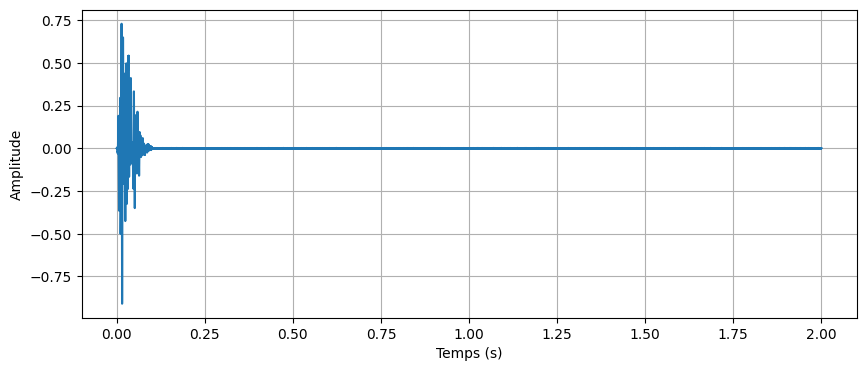

In [6]:
module_white_noise = ModulatedWhiteNoise(
    sr=44100, T_signal=2., params_config=None)

signal_white_noise = module_white_noise.generate(
    fc=500,
    temporal_support=.1,
    tau_attack=0.01,
)

plt.figure(figsize=(10, 4))
plt.plot(module_white_noise.t, signal_white_noise)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

display(Audio(signal_white_noise, rate=module_white_noise.sr))

## AR model

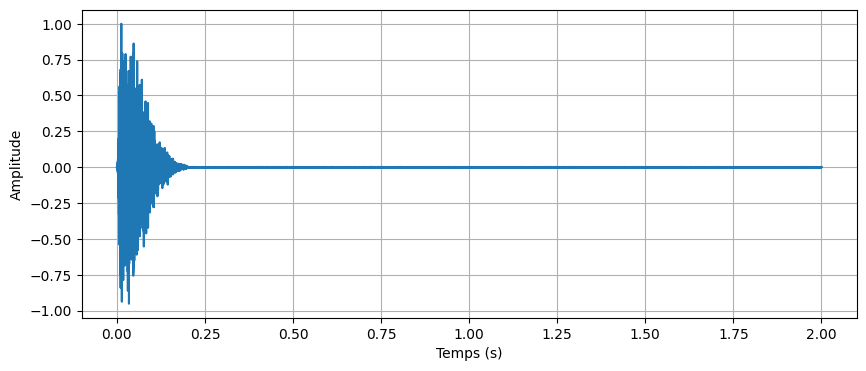

In [7]:
from synthetic_impulse_noise import ARImpulseNoise

module_ar_impulse = ARImpulseNoise(
    sr=44100, T_signal=2., params_config=None
)

signal_ar_impulse = module_ar_impulse.generate(
    ar_coeffs=module_ar_impulse.random_stable_ar_coeffs_complex(4),
    tau_attack=0.01,
    temporal_support=.2
)

plt.figure(figsize=(10, 4))
plt.plot(module_ar_impulse.t, signal_ar_impulse)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

display(Audio(signal_ar_impulse, rate=module_ar_impulse.sr))

/home/admin/miniconda3/envs/perceptual_anc/lib/python3.11/site-packages/audiomentations/core/transforms_interface.py:108: UserWarning: Warning: input samples dtype is np.float64. Converting to np.float32
  warnings.warn(


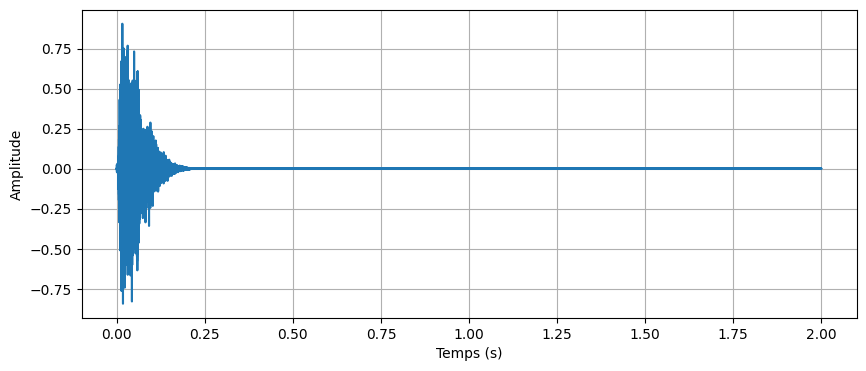

In [8]:
from audiomentations import *

sr = 44100

augment = Compose(
    [TimeStretch(min_rate=0.9, max_rate=1.1, p=0.5),
     PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
     SevenBandParametricEQ(min_gain_db=-10, max_gain_db=10, p=0.5),
     #  ApplyImpulseResponse(
     #      ir_path="rir_path", leave_length_unchanged=False, p=1.0)
     ])

augmented_samples = augment(samples=signal_ar_impulse, sample_rate=sr)

plt.figure(figsize=(10, 4))
plt.plot(module_ar_impulse.t, augmented_samples)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

display(Audio(augmented_samples, rate=sr))

## Testing random generation

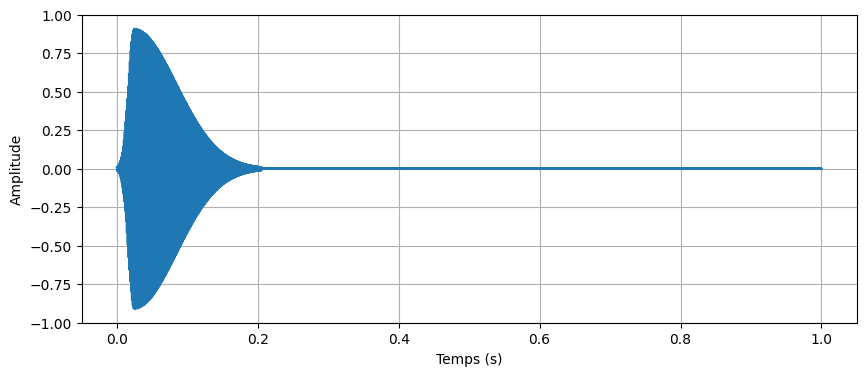

In [9]:
from config import chirp as chirp_config

sr = 44100
duration = 1.

chirp_generator = ModulatedChirp(
    sr=sr,
    T_signal=duration,
    params_config=chirp_config)

signal, _ = chirp_generator.forward()

plt.figure(figsize=(10, 4))
plt.plot(chirp_generator.t, signal)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

display(Audio(signal, rate=chirp_generator.sr))

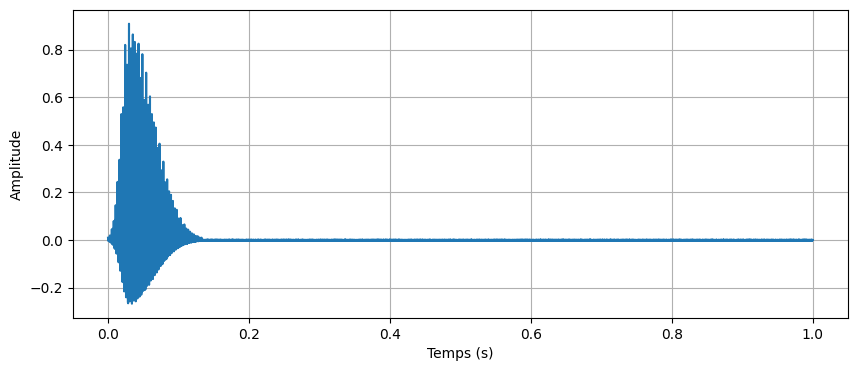

In [10]:
from config import harmonic as harmonic_config

harmonic_generator = ModulatedHarmonicSum(
    sr=sr, T_signal=duration, params_config=harmonic_config)

signal, _ = harmonic_generator.forward()

plt.figure(figsize=(10, 4))
plt.plot(chirp_generator.t, signal)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

display(Audio(signal, rate=sr))

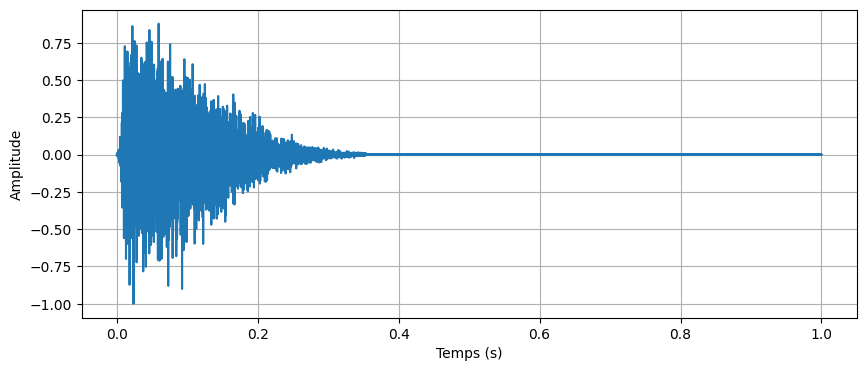

1.0


In [20]:
from config import ar_impulse as ar_impulse_config

ar_impulse_generator = ARImpulseNoise(
    sr=sr, T_signal=duration, params_config=ar_impulse_config)

signal, _ = ar_impulse_generator.forward()

plt.figure(figsize=(10, 4))
plt.plot(chirp_generator.t, signal)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

display(Audio(signal, rate=sr))

print(np.max(np.abs(signal)))

In [16]:
print(np.max(np.abs(signal)))

1.0
